In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
data = pd.read_csv('data/oil_stocks.csv')

In [3]:
data['date'] = pd.to_datetime(data['Date '], format='%d-%b-%Y')


In [4]:
data.drop("Date ", axis=1, inplace=True)

In [5]:
data.set_index("date", inplace=True)

In [6]:
data.columns = data.columns.str.strip().str.replace(" ", "_")

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data  = data[["open"]]

<Axes: xlabel='date'>

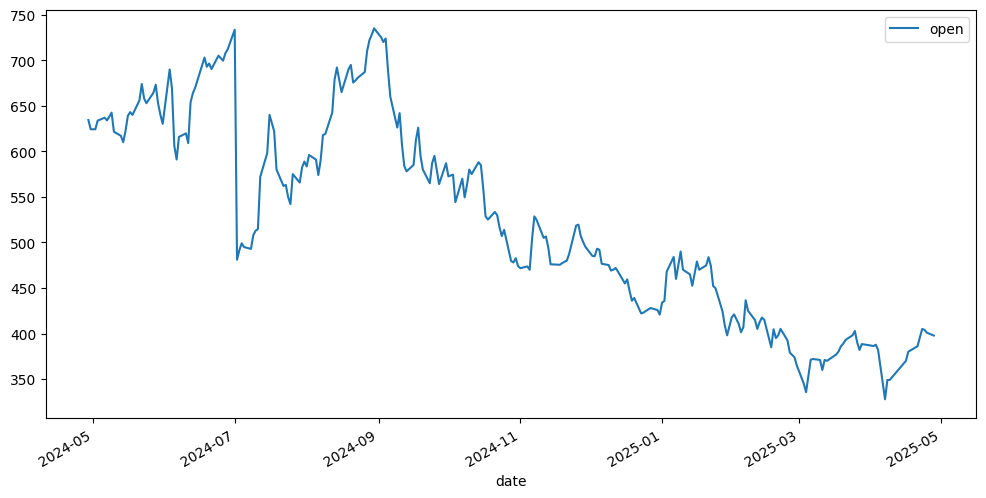

In [9]:
data.plot(figsize=(12,6))

In [12]:
data.sort_index(inplace=True)

In [13]:
data.sort_index()

,open
date,
2024-04-29,634.40
2024-04-30,624.20
2024-05-02,624.20
2024-05-03,633.70
2024-05-06,636.90
...,...
2025-04-22,395.85
2025-04-23,405.00
2025-04-24,404.00


In [14]:
empty_df  = pd.DataFrame()
empty_df.index = pd.date_range(datetime.datetime.strftime(data.index[0],format="%Y-%m-%d"),datetime.datetime.strftime(data.index[-1],format="%Y-%m-%d"),freq='D')

In [15]:
data = pd.merge(data,empty_df,how='right',left_index=True,right_index=True)

In [17]:
data.sort_index(inplace=True)

In [18]:
data

,open
2024-04-29,634.40
2024-04-30,624.20
2024-05-01,NaN
2024-05-02,624.20
2024-05-03,633.70
...,...
2025-04-24,404.00
2025-04-25,400.90
2025-04-26,NaN
2025-04-27,NaN


In [12]:
import pandas as pd
from IPython.display import display, HTML

# Your DataFrame
df = pd.DataFrame({
    'col1': range(100),
    'col2': range(100, 200)
})

# Scrollable box (vertical and horizontal)
html = data.to_html()
display(HTML(f"""
<div style="height:300px; width:100%; overflow:auto; border:1px solid #ccc">
    {html}
</div>
"""))


,open
2024-04-29,634.40
2024-04-30,624.20
2024-05-01,NaN
2024-05-02,624.20
2024-05-03,633.70
2024-05-04,NaN
2024-05-05,NaN
2024-05-06,636.90
2024-05-07,634.00
2024-05-08,637.90


In [19]:
data.index.rename('Date',inplace=True)

In [20]:
null_index = data.index.get_indexer(data[data["open"].isnull()].index)

In [22]:

window_size = 2


In [23]:
for i in null_index:
    # Not accurate
    slice_df  = data.iloc[abs(i - window_size):i + window_size]
    fill_value = slice_df.mean()
    slice_df.fillna(fill_value,inplace=True)


/tmp/ipykernel_11348/3530965936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slice_df.fillna(fill_value,inplace=True)


In [24]:
data.isnull().sum()

open    0
dtype: int64

In [26]:
data.sort_index(inplace=True)

In [ ]:
# data.to_parquet("data/oil_stocks_cleaned.parquet", index=True)

<Axes: xlabel='Date'>

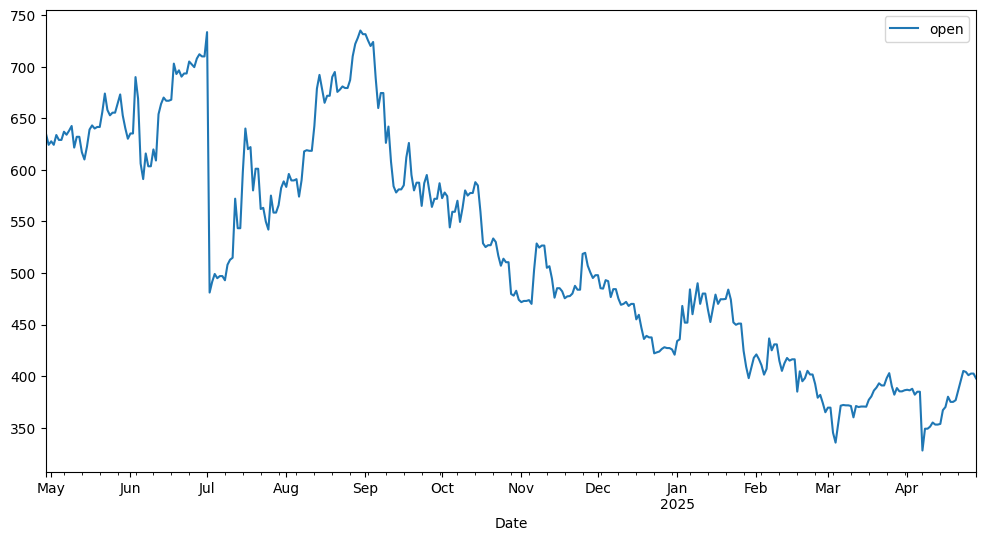

In [28]:
data.plot(figsize=(12,6))

In [27]:
data

,open
Date,
2024-04-29,634.40
2024-04-30,624.20
2024-05-01,627.60
2024-05-02,624.20
2024-05-03,633.70
...,...
2025-04-24,404.00
2025-04-25,400.90
2025-04-26,402.45
